# 🥇 Análisis del Top 10 Histórico de Países en Juegos Olímpicos

Esta notebook analiza cómo ha variado el top 10 de países en función de la cantidad total de medallas obtenidas a lo largo de los Juegos Olímpicos. Se consideran todas las ediciones disponibles en el dataset.

El objetivo es identificar qué países han dominado históricamente y cómo ha evolucionado su rendimiento con el tiempo.

Fuente de datos: Wikipedia (medallas_historicas.csv)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar dataset
df = pd.read_csv("../data/medallas_historicas.csv")

# Vista general
df.head()


,Año,País,Oro,Plata,Bronce,Total
0,1896,United States,11,7,2,20
1,1896,Greece,10,18,19,47
2,1896,Germany,6,5,2,13
3,1896,France,5,4,2,11
4,1896,Great Britain,2,3,2,7


In [2]:
# Ver nombres de columnas
print(df.columns)

# Limpiar nombres si es necesario
df.columns = df.columns.str.strip()


Index(['Año', 'País', 'Oro', 'Plata', 'Bronce', 'Total'], dtype='object')


In [3]:
# Agrupar por país y sumar medallas
top10_total = df.groupby("País")["Total"].sum().sort_values(ascending=False).head(10)
top10_paises = top10_total.index.tolist()

print("Top 10 países históricos:")
print(top10_total)


Top 10 países históricos:
País
United States    2768
Soviet Union     1010
Great Britain     991
France            830
China             727
Germany           705
Italy             669
Australia         598
Japan             543
Hungary           524
Name: Total, dtype: int64


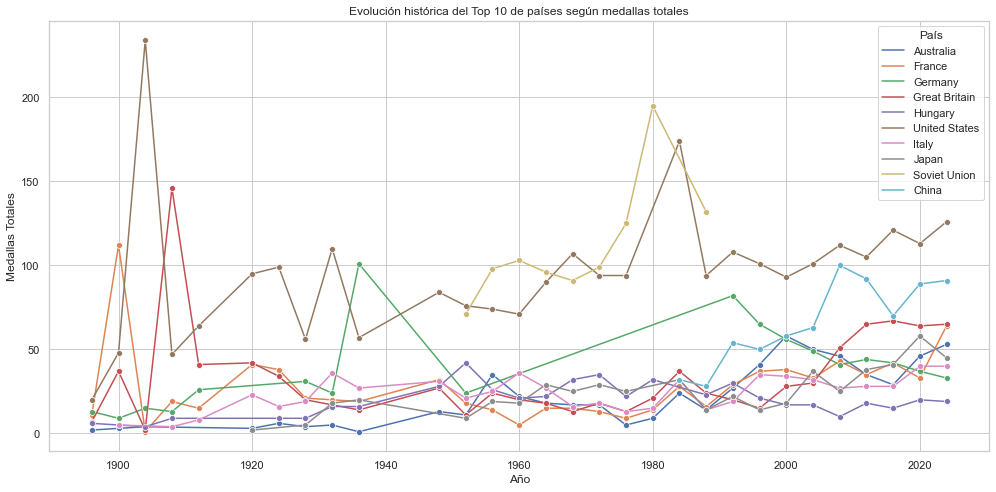

<Figure size 864x432 with 0 Axes>

In [11]:
# Filtrar solo los países top 10
df_top10 = df[df["País"].isin(top10_paises)]

# Agrupar por año y país
evolucion = df_top10.groupby(["Año", "País"])["Total"].sum().reset_index()

# Gráfico de evolución
plt.figure(figsize=(14, 7))
sns.lineplot(data=evolucion, x="Año", y="Total", hue="País", marker="o")
plt.title("Evolución histórica del Top 10 de países según medallas totales")
plt.xlabel("Año")
plt.ylabel("Medallas Totales")
plt.legend(title="País")
plt.tight_layout()
plt.show()
plt.savefig("../images/top10_evolucion.png", dpi=300, bbox_inches="tight")



In [5]:
# Crear ranking por año
ranking_anual = (
    df.groupby(["Año", "País"])["Total"]
    .sum()
    .reset_index()
    .sort_values(["Año", "Total"], ascending=[True, False])
)

# Crear top10 por año
top10_por_anio = ranking_anual.groupby("Año").head(10)

# Contar cuántas veces aparece cada país en el top 10
frecuencia_top10 = top10_por_anio["País"].value_counts()

# Mostrar
print("Países con más apariciones en el top 10 por edición:")
print(frecuencia_top10.head(15))


Países con más apariciones en el top 10 por edición:
United States    29
Great Britain    24
France           23
Italy            23
Germany          18
Hungary          16
Australia        16
Japan            15
China            11
Sweden           10
Soviet Union      9
Finland           9
South Korea       8
Switzerland       8
Canada            7
Name: País, dtype: int64


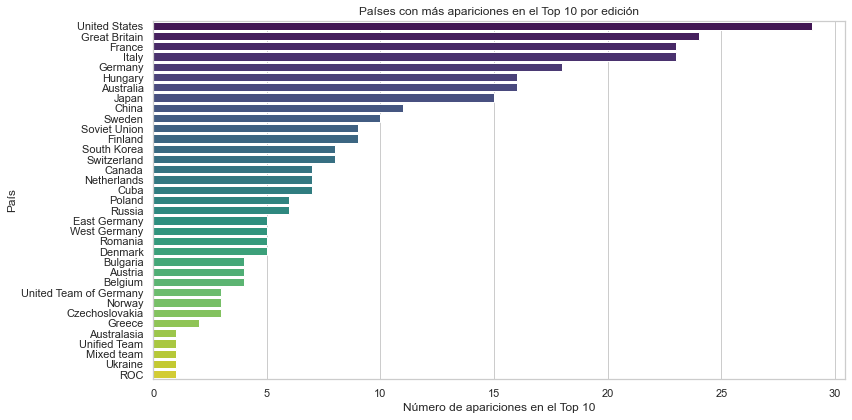

In [10]:
# Conteo de apariciones en el top 10 por año
apariciones_top10 = top10_por_anio["País"].value_counts()

# Convertir a DataFrame para graficar fácilmente
apariciones_df = apariciones_top10.reset_index()
apariciones_df.columns = ["País", "Apariciones"]

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=apariciones_df, x="Apariciones", y="País", palette="viridis")
plt.title("Países con más apariciones en el Top 10 por edición")
plt.xlabel("Número de apariciones en el Top 10")
plt.ylabel("País")
plt.tight_layout()
plt.savefig("../images/top10_apariciones.png", dpi=300, bbox_inches="tight")
plt.show()


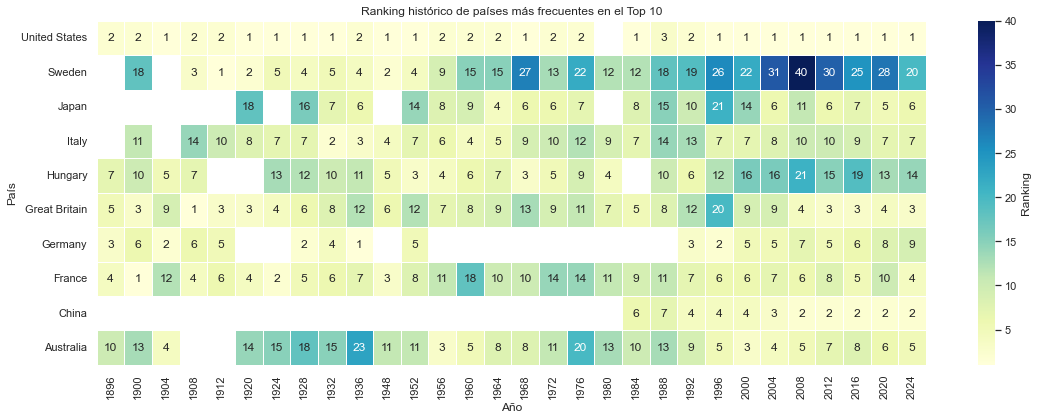

In [ ]:
# Crear columna de ranking dentro de cada año
ranking_anual["Ranking"] = ranking_anual.groupby("Año")["Total"].rank(ascending=False, method="first")

# Filtrar los países que más veces estuvieron en el top 10
paises_frecuentes = apariciones_top10.head(10).index.tolist()

# Filtrar datos
ranking_filtrado = ranking_anual[ranking_anual["País"].isin(paises_frecuentes)]

# Pivotear para heatmap
pivot = ranking_filtrado.pivot(index="País", columns="Año", values="Ranking")

# Crear heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5, linecolor="white", annot=True, cbar_kws={"label": "Ranking"})
plt.title("Ranking histórico de países más frecuentes en el Top 10")
plt.xlabel("Año")
plt.ylabel("País")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../images/Prevalencia_en_top10.png", dpi=300, bbox_inches="tight")
plt.show()


